In [3]:
#Begin analysis
import pandas as pd
import numpy as np

In [4]:
#loading the files

print("Reading file...")
data = pd.read_csv('owid_climate_data.csv')
print(f"Loaded {len(data)} rows")

Reading file...
Loaded 26182 rows


In [5]:
#Get basic info

print("\nBasic info:")
print(data.info())


Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                26182 non-null  object 
 1   Country Code                22895 non-null  object 
 2   Year                        26182 non-null  int64  
 3   CO2 Emissions Per Capita    26182 non-null  float64
 4   Annual Temperature Anomaly  14319 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1022.9+ KB
None


In [6]:
#Check first 5 rows

print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
  Country Name Country Code  Year  CO2 Emissions Per Capita  \
0  Afghanistan          AFG  1949                  0.001992   
1  Afghanistan          AFG  1950                  0.010837   
2  Afghanistan          AFG  1951                  0.011625   
3  Afghanistan          AFG  1952                  0.011468   
4  Afghanistan          AFG  1953                  0.013123   

   Annual Temperature Anomaly  
0                   -2.020418  
1                   -2.298886  
2                   -1.287201  
3                   -1.237078  
4                   -1.084867  


In [7]:
# Count missing values per column
print("Missing values per column:")
print(data.isnull().sum())
# Percentage of missing values
print("\nPercentage missing:")
print(data.isnull().mean() * 100)

Missing values per column:
Country Name                      0
Country Code                   3287
Year                              0
CO2 Emissions Per Capita          0
Annual Temperature Anomaly    11863
dtype: int64

Percentage missing:
Country Name                   0.000000
Country Code                  12.554427
Year                           0.000000
CO2 Emissions Per Capita       0.000000
Annual Temperature Anomaly    45.309755
dtype: float64


In [8]:
print("Data range validation:")
print(f"Year range: {data['Year'].min()} to {data['Year'].max()}")
print(f"CO2 range: {data['CO2 Emissions Per Capita'].min():.3f} to {data['CO2 Emissions Per Capita'].max():.3f}")
print(f"Temperature anomaly range: {data['Annual Temperature Anomaly'].min():.3f} to {data['Annual Temperature Anomaly'].max():.3f}")

Data range validation:
Year range: 1750 to 2023
CO2 range: 0.000 to 796.391
Temperature anomaly range: -4.312 to 2.430


In [13]:
pip install seaborn matplotlib ipywidgets ipython

Note: you may need to restart the kernel to use updated packages.


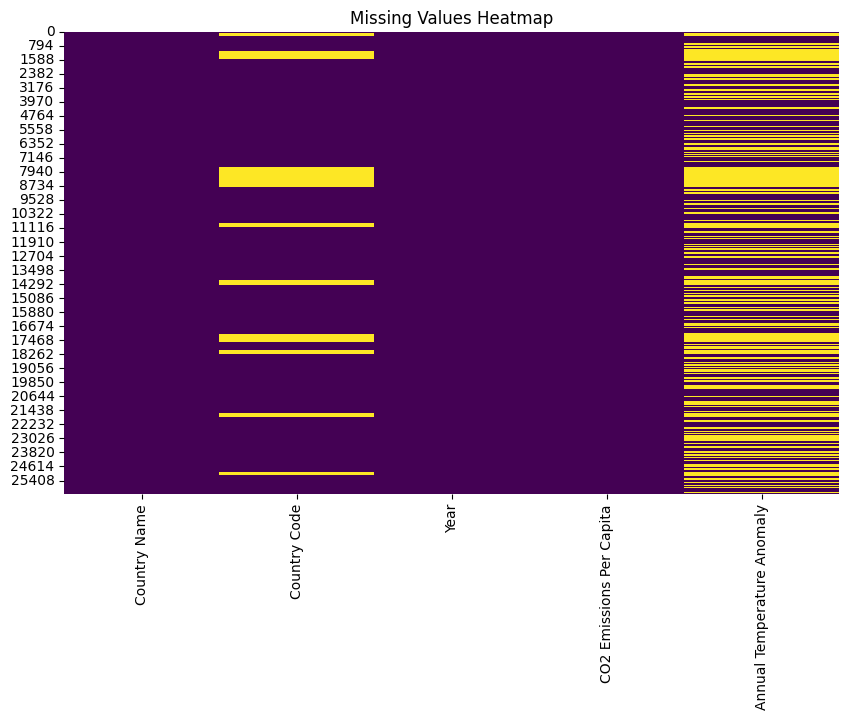

In [14]:
#Display heat map of mising values

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [15]:
print("Missing values per column:")
missing_summary = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data) * 100).round(1)
for col in data.columns:
    print(f"{col}: {missing_summary[col]} ({missing_percent[col]}%)")

Missing values per column:
Country Name: 0 (0.0%)
Country Code: 3287 (12.6%)
Year: 0 (0.0%)
CO2 Emissions Per Capita: 0 (0.0%)
Annual Temperature Anomaly: 11863 (45.3%)


In [16]:
#Map data types

print("\nData types:")
print(data.dtypes)


Data types:
Country Name                   object
Country Code                   object
Year                            int64
CO2 Emissions Per Capita      float64
Annual Temperature Anomaly    float64
dtype: object


In [17]:
#Checking country codes

print("\nCountry codes - checking for regions:")
no_codes = data[data['Country Code'].isnull()]
print(f"Rows without country codes: {len(no_codes)}")
print("Sample entries without codes:")
print(no_codes['Country Name'].unique()[:10])


Country codes - checking for regions:
Rows without country codes: 3287
Sample entries without codes:
['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'High-income countries' 'Low-income countries']


In [18]:
#check range of years for data

print(f"\nYear range: {data['Year'].min()} to {data['Year'].max()}")



Year range: 1750 to 2023


In [19]:
print("\nMissing temperature data by year period:")
pre_1940 = data[data['Year'] < 1940]
missing_temp_pre1940 = pre_1940['Annual Temperature Anomaly'].isnull().sum()
total_pre1940 = len(pre_1940)
print(f"Pre-1940: {missing_temp_pre1940}/{total_pre1940} missing ({missing_temp_pre1940/total_pre1940*100:.1f}%)")



Missing temperature data by year period:
Pre-1940: 8735/8735 missing (100.0%)


In [20]:
post_1940 = data[data['Year'] >= 1940]
missing_temp_post1940 = post_1940['Annual Temperature Anomaly'].isnull().sum()
total_post1940 = len(post_1940)
print(f"Post-1940: {missing_temp_post1940}/{total_post1940} missing ({missing_temp_post1940/total_post1940*100:.1f}%)")


Post-1940: 3128/17447 missing (17.9%)


In [21]:
print("\nCountries with NO temperature data:")
countries_temp = data.groupby('Country Name')['Annual Temperature Anomaly'].apply(lambda x: x.notna().any())
countries_no_temp = countries_temp[~countries_temp].index.tolist()
print(f"Total: {len(countries_no_temp)} countries/regions")
print("Examples:", countries_no_temp[:8])


Countries with NO temperature data:
Total: 44 countries/regions
Examples: ['Africa', 'Aruba', 'Asia', 'Asia (excl. China and India)', 'Barbados', 'Bermuda', 'Bonaire Sint Eustatius and Saba', 'British Virgin Islands']


In [67]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from IPython.display import HTML

In [68]:
countries = sorted(data['Country Name'].unique())
years = sorted(data['Year'].unique())

In [129]:
country_dropdown = widgets.Dropdown(
    options=countries,
    description='Country:',
    value='Australia'  # Default, you can change to any country that has data
)

In [116]:
start_year = widgets.IntSlider(
    value=1930,  # start year
    min=years[0],
    max=years[-1],
    step=1,
    description='Start Year:'
)

In [117]:
end_year = widgets.IntSlider(
    value=2025,  # end year
    min=years[0],
    max=years[-1],
    step=1,
    description='End Year:'
)

In [118]:
def get_country_data(country, start_year, end_year):
    country_data = data[data['Country Name'] == country]
    country_data = country_data[country_data['Year'] >= start_year]
    country_data = country_data[country_data['Year'] <= end_year]
    return country_data

In [119]:
def show_country_data(country, start_year, end_year):
    clear_output(wait=True)  # This clears old output
    filtered = get_country_data(country, start_year, end_year)
    print(f"Data for {country} from {start_year} to {end_year}:")
    print(f"Records found: {len(filtered)}")
    
    
    
    pd.set_option('display.max_rows', 500)
    display(filtered)
    pd.reset_option('display.max_rows')  # Reset back to default

display(widgets.interactive(
    show_country_data,
    country=country_dropdown,
    start_year=start_year_slider,
    end_year=end_year_slider
))

interactive(children=(Dropdown(description='Country:', index=13, options=('Afghanistan', 'Africa', 'Albania', …

In [120]:
# Find countries with no temperature data
countries_temp = data.groupby('Country Name')['Annual Temperature Anomaly'].apply(lambda x: x.notna().any())
countries_no_temp = countries_temp[~countries_temp].index.tolist()


In [121]:
# Add indicator columns
data['IS_COUNTRY'] = data['Country Code'].notna()
data['PRE_1940'] = data['Year'] < 1940
data['COUNTRY_NO_TEMPS'] = data['Country Name'].isin(countries_no_temp)

In [122]:
print(f"Countries: {data['IS_COUNTRY'].sum()}")
print(f"Regions: {(~data['IS_COUNTRY']).sum()}")
print(f"Pre-1940: {data['PRE_1940'].sum()}")
print(f"Post-1940: {(~data['PRE_1940']).sum()}")

Countries: 22895
Regions: 3287
Pre-1940: 8735
Post-1940: 17447


In [123]:
clean_data = data[data['IS_COUNTRY'] & ~data['PRE_1940'] & ~data['COUNTRY_NO_TEMPS']]
print(f"Clean dataset: {len(clean_data)} rows")

Clean dataset: 14319 rows


In [124]:
data.to_csv('owid_climate_data_cleaned.csv', index=False)
print("Saved: owid_climate_data_cleaned.csv")

Saved: owid_climate_data_cleaned.csv


In [126]:

# you can change your country here after country name, its set up for australia though

australia_data = data[(data['Country Name'] == 'Australia') & (data['Year'] >= 1940)]

In [127]:
australia_temp = australia_data.dropna(subset=['Annual Temperature Anomaly'])

print(f"Australia temperature data: {len(australia_temp)} records from {australia_temp['Year'].min()} to {australia_temp['Year'].max()}")

Australia temperature data: 84 records from 1940 to 2023


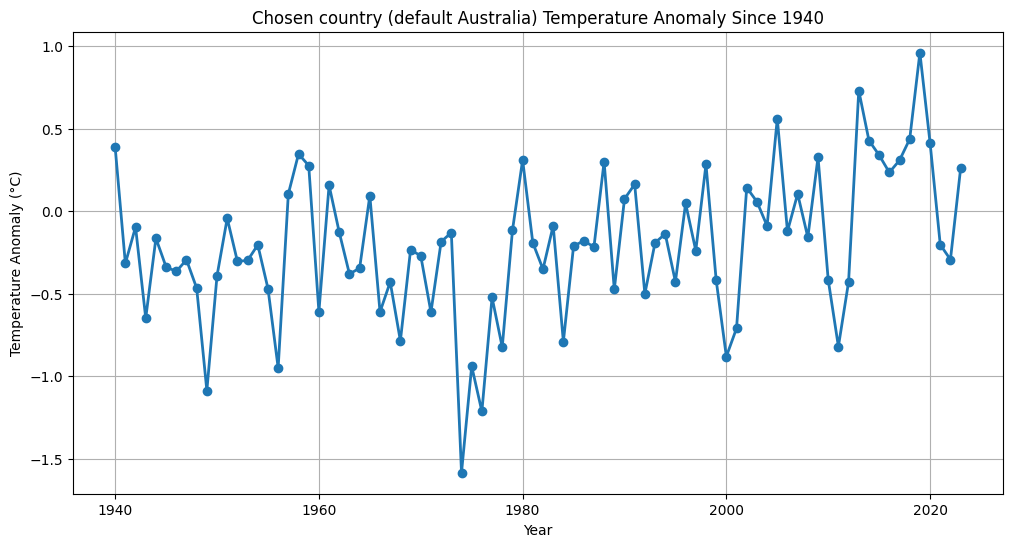

In [128]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(australia_temp['Year'], australia_temp['Annual Temperature Anomaly'], marker='o', linewidth=2)
plt.title('Chosen country (default Australia) Temperature Anomaly Since 1940')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

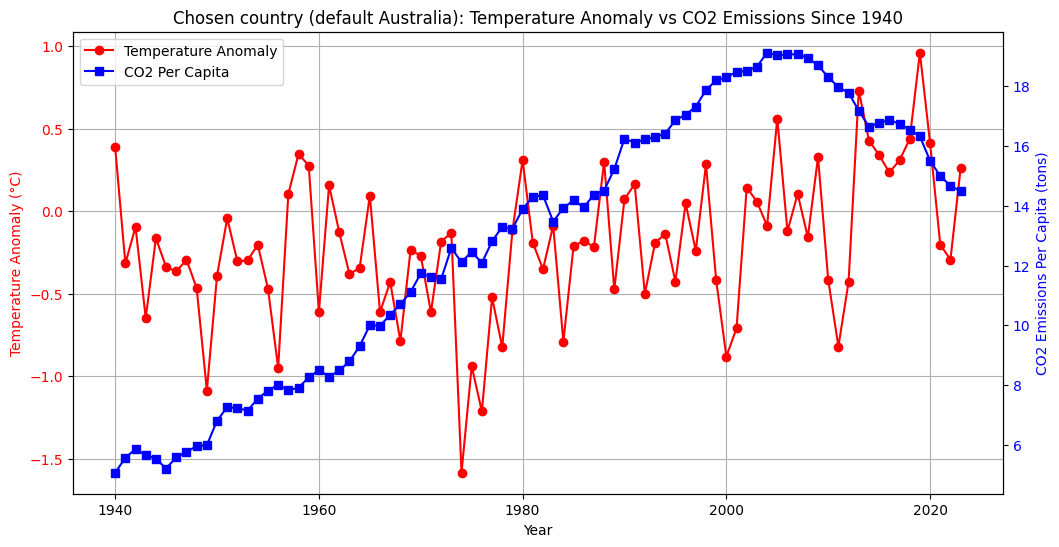

In [184]:
# Create the graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

plt.title('Chosen country (default Australia): Temperature Anomaly vs CO2 Emissions Since 1940')
ax1.grid(True)

# Plot temperature anomaly (left y-axis)
ax1.plot(australia_temp['Year'], australia_temp['Annual Temperature Anomaly'], 'r-', marker='o', label='Temperature Anomaly')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature Anomaly (°C)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create second y-axis for CO2
ax2 = ax1.twinx()
ax2.plot(australia_temp['Year'], australia_temp['CO2 Emissions Per Capita'], 'b-', marker='s', label='CO2 Per Capita')
ax2.set_ylabel('CO2 Emissions Per Capita (tons)', color='b')
ax2.tick_params(axis='y', labelcolor='b')


# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

In [185]:
# Show correlation
print(f"Temperature anomaly range: {australia_temp['Annual Temperature Anomaly'].min():.2f} to {australia_temp['Annual Temperature Anomaly'].max():.2f}°C")
print(f"CO2 emissions range: {australia_temp['CO2 Emissions Per Capita'].min():.2f} to {australia_temp['CO2 Emissions Per Capita'].max():.2f} tons per capita")

Temperature anomaly range: -1.58 to 0.96°C
CO2 emissions range: 5.07 to 19.11 tons per capita


In [186]:
# Import scipy for statistical tests
from scipy import stats

In [187]:
# Use the same Australia data from before
australia_data = data[(data['Country Name'] == 'Australia') & (data['Year'] >= 1940)]
australia_temp = australia_data.dropna(subset=['Annual Temperature Anomaly'])

# Get the two variables for correlation
temp_anomaly = australia_temp['Annual Temperature Anomaly']
co2_emissions = australia_temp['CO2 Emissions Per Capita']

print("Correlation Analysis: Australia Temperature vs CO2")
print(f"Sample size: {len(temp_anomaly)} data points")
print()

Correlation Analysis: Australia Temperature vs CO2
Sample size: 84 data points



In [188]:
# Pearson correlation (measures linear relationship)
correlation_coef, p_value = stats.pearsonr(temp_anomaly, co2_emissions)

print(f"Pearson Correlation Coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value:.6f}")
print()


Pearson Correlation Coefficient: 0.2474
P-value: 0.023301



In [189]:
# Interpret  the correlation strength
if abs(correlation_coef) >= 0.7:
    strength = "Strong"
elif abs(correlation_coef) >= 0.3:
    strength = "Moderate"
else:
    strength = "Weak"


In [190]:
#Interpret the direction
direction = "positive" if correlation_coef > 0 else "negative"

print(f"Interpretation:")
print(f"- {strength} {direction} correlation")
print(f"- Statistical significance: {'Significant' if p_value < 0.05 else 'Not significant'} (p < 0.05)")
print()

Interpretation:
- Weak positive correlation
- Statistical significance: Significant (p < 0.05)



In [191]:
#interpretation of what we found
if p_value < 0.05:
    print(f"Result: There IS a statistically significant relationship")
    if correlation_coef > 0:
        print("As temperature anomaly increases, CO2 emissions tend to increase")
    else:
        print("As temperature anomaly increases, CO2 emissions tend to decrease")
else:
    print("Result: NO statistically significant relationship found")
    
print(f"\nNote: Correlation does not imply causation!")

Result: There IS a statistically significant relationship
As temperature anomaly increases, CO2 emissions tend to increase

Note: Correlation does not imply causation!


Top ten co2 Emitters in 2020
Qatar: 36.56 tons per person
Bahrain: 25.22 tons per person
Brunei: 24.94 tons per person
Trinidad and Tobago: 23.68 tons per person
United Arab Emirates: 23.01 tons per person
Kuwait: 21.74 tons per person
Saudi Arabia: 19.88 tons per person
New Caledonia: 17.98 tons per person
Australia: 15.51 tons per person
Oman: 15.17 tons per person


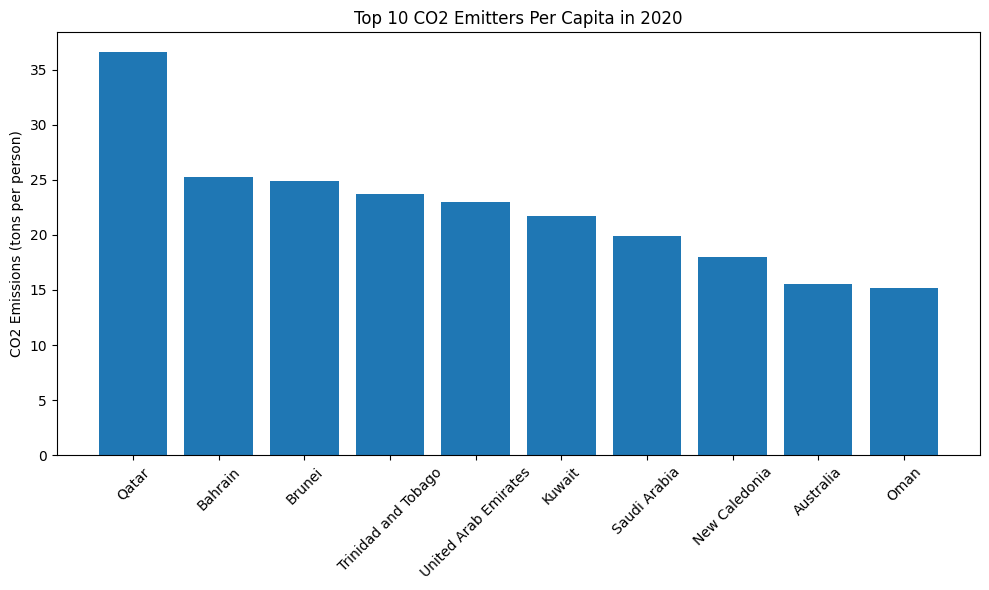

In [192]:
# Shows which countries emit the most CO2 per person

co2_2020 = data_with_temps[(data_with_temps['Year'] == 2020) & data_with_temps['IS_COUNTRY']]
# Check which countries have enough data points for correlation
good_countries = []
for i, row in co2_2020.iterrows():
    country_name = row['Country Name']
    country_data = data_with_temps[(data_with_temps['Country Name'] == country_name) & (data_with_temps['Year'] >= 1940)]
    country_clean = country_data.dropna(subset=['Annual Temperature Anomaly'])
    if len(country_clean) >= 10:
        good_countries.append(country_name)

# Get top 10 from countries with enough data
top_10 = co2_2020[co2_2020['Country Name'].isin(good_countries) & co2_2020['IS_COUNTRY']].nlargest(10, 'CO2 Emissions Per Capita')

print("Top ten co2 Emitters in 2020")
for i, row in top_10.iterrows():
    print(f"{row['Country Name']}: {row['CO2 Emissions Per Capita']:.2f} tons per person")

plt.figure(figsize=(10, 6))
plt.bar(top_10['Country Name'], top_10['CO2 Emissions Per Capita'])
plt.title('Top 10 CO2 Emitters Per Capita in 2020')
plt.ylabel('CO2 Emissions (tons per person)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [193]:
print("Top 10 CO2 Emitters in 2020")
for i, row in top_10.iterrows():
    temp = row['Annual Temperature Anomaly']
    if pd.isna(temp):
        temp_str = "No data"
    else:
        temp_str = f"{temp:.2f}°C"
    print(f"{row['Country Name']}: {row['CO2 Emissions Per Capita']:.1f} tons CO2, Temp anomaly: {temp_str}")

Top 10 CO2 Emitters in 2020
Qatar: 36.6 tons CO2, Temp anomaly: 0.61°C
Bahrain: 25.2 tons CO2, Temp anomaly: 0.54°C
Brunei: 24.9 tons CO2, Temp anomaly: 0.49°C
Trinidad and Tobago: 23.7 tons CO2, Temp anomaly: 0.30°C
United Arab Emirates: 23.0 tons CO2, Temp anomaly: 0.55°C
Kuwait: 21.7 tons CO2, Temp anomaly: 0.73°C
Saudi Arabia: 19.9 tons CO2, Temp anomaly: 0.56°C
New Caledonia: 18.0 tons CO2, Temp anomaly: 0.35°C
Australia: 15.5 tons CO2, Temp anomaly: 0.41°C
Oman: 15.2 tons CO2, Temp anomaly: 0.06°C


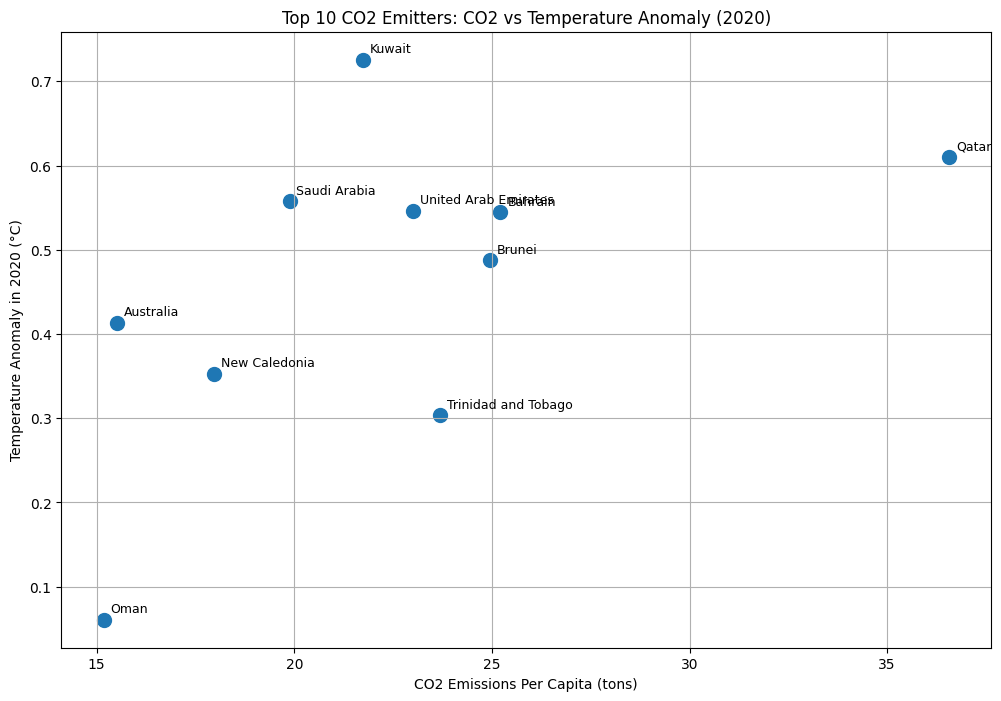

In [194]:
# Create scatter plot
top_10_clean = top_10.dropna(subset=['Annual Temperature Anomaly'])

plt.figure(figsize=(12, 8))
plt.scatter(top_10_clean['CO2 Emissions Per Capita'], top_10_clean['Annual Temperature Anomaly'], s=100)

# Add country labels
for i, row in top_10_clean.iterrows():
    plt.annotate(row['Country Name'], 
                (row['CO2 Emissions Per Capita'], row['Annual Temperature Anomaly']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('CO2 Emissions Per Capita (tons)')
plt.ylabel('Temperature Anomaly in 2020 (°C)')
plt.title('Top 10 CO2 Emitters: CO2 vs Temperature Anomaly (2020)')
plt.grid(True)
plt.show()

In [195]:
# Get correlation and p-value for each country individually
print("\nIndividual Country Analysis")
print("Country | Correlation | P-value | Significant?")
print("-" * 50)
for i, row in top_10.iterrows():
    country_name = row['Country Name']
    
    # Get all data for this country since 1940 (when temperature data starts)
    country_data = data_with_temps[(data_with_temps['Country Name'] == country_name) & (data_with_temps['Year'] >= 1940)]
    country_clean = country_data.dropna(subset=['Annual Temperature Anomaly'])
    
    if len(country_clean) >= 10:  # Need enough data points
        correlation, p_value = stats.pearsonr(
            country_clean['Annual Temperature Anomaly'], 
            country_clean['CO2 Emissions Per Capita']
        )
        
        significant = "Yes" if p_value < 0.05 else "No"
        print(f"{country_name:<15} | {correlation:>7.3f} | {p_value:>7.4f} | {significant}")
    else:
        print(f"{country_name:<15} | No data | No data | No data")


Individual Country Analysis
Country | Correlation | P-value | Significant?
--------------------------------------------------
Qatar           |  -0.033 |  0.7811 | No
Bahrain         |   0.130 |  0.2371 | No
Brunei          |  -0.224 |  0.0403 | Yes
Trinidad and Tobago |   0.616 |  0.0000 | Yes
United Arab Emirates |  -0.153 |  0.2248 | No
Kuwait          |   0.051 |  0.6551 | No
Saudi Arabia    |   0.630 |  0.0000 | Yes
New Caledonia   |   0.138 |  0.2421 | No
Australia       |   0.247 |  0.0233 | Yes
Oman            |   0.759 |  0.0000 | Yes


In [178]:
# Check USA correlation and p-value
usa_data = data[(data['Country Name'] == 'United States') & (data['Year'] >= 1940)]
usa_clean = usa_data.dropna(subset=['Annual Temperature Anomaly'])

print(f"=== USA Analysis ===")
print(f"Data points: {len(usa_clean)} records from {usa_clean['Year'].min()} to {usa_clean['Year'].max()}")

# Get correlation and p-value
correlation, p_value = stats.pearsonr(
    usa_clean['Annual Temperature Anomaly'], 
    usa_clean['CO2 Emissions Per Capita']
)

print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")

# Simple interpretation
if p_value < 0.05:
    if correlation > 0:
        print("Result: Temperature and CO2 have a significant POSITIVE relationship")
    else:
        print("Result: Temperature and CO2 have a significant NEGATIVE relationship")
else:
    print("Result: No significant relationship between temperature and CO2")

=== USA Analysis ===
Data points: 84 records from 1940 to 2023
Correlation coefficient: -0.0835
P-value: 0.450419
Statistically significant: No
Result: No significant relationship between temperature and CO2


In [179]:
# Check each country
countries_temp_check = data.groupby('Country Name')['Annual Temperature Anomaly'].apply(lambda x: x.notna().any())
countries_no_temp = countries_temp_check[~countries_temp_check].index.tolist()

print(f"Countries with NO temperature data: {len(countries_no_temp)}")
print("Examples:", countries_no_temp[:10])
print()

Countries with NO temperature data: 44
Examples: ['Africa', 'Aruba', 'Asia', 'Asia (excl. China and India)', 'Barbados', 'Bermuda', 'Bonaire Sint Eustatius and Saba', 'British Virgin Islands', 'Curacao', 'Dominica']



In [180]:
# Show current data size
print(f"Original data size: {len(data)} rows")
print(f"Countries in original data: {data['Country Name'].nunique()}")

Original data size: 26182 rows
Countries in original data: 231


In [181]:
# Remove countries with no temperature data
data_with_temps = data[~data['Country Name'].isin(countries_no_temp)& data['IS_COUNTRY']]

In [182]:
print(f"After removing countries with no temp data: {len(data_with_temps)} rows")
print(f"Countries remaining: {data_with_temps['Country Name'].nunique()}")
print(f"Rows removed: {len(data) - len(data_with_temps)}")

After removing countries with no temp data: 20957 rows
Countries remaining: 187
Rows removed: 5225


In [183]:

# Get correlation and p-value for each country individually
print("\nIndividual Country Analysis")
print("Country | Correlation | P-value | Significant?")
print("-" * 50)
for i, row in top_10_clean.iterrows():
    country_name = row['Country Name']
    
    # Get all data for this country since 1940 (when temperature data starts)
    country_data = data_with_temps[(data_with_temps['Country Name'] == country_name) & (data_with_temps['Year'] >= 1940)]
    country_clean = country_data.dropna(subset=['Annual Temperature Anomaly'])
    
    if len(country_clean) >= 10:  # Need enough data points
        correlation, p_value = stats.pearsonr(
            country_clean['Annual Temperature Anomaly'], 
            country_clean['CO2 Emissions Per Capita']
        )
        
        significant = "Yes" if p_value < 0.05 else "No"
        print(f"{country_name:<15} | {correlation:>7.3f} | {p_value:>7.4f} | {significant}")
    else:
        print(f"{country_name:<15} | No data | No data | No data")


Individual Country Analysis
Country | Correlation | P-value | Significant?
--------------------------------------------------
Qatar           |  -0.033 |  0.7811 | No
Bahrain         |   0.130 |  0.2371 | No
Brunei          |  -0.224 |  0.0403 | Yes
Trinidad and Tobago |   0.616 |  0.0000 | Yes
United Arab Emirates |  -0.153 |  0.2248 | No
Kuwait          |   0.051 |  0.6551 | No
Saudi Arabia    |   0.630 |  0.0000 | Yes
New Caledonia   |   0.138 |  0.2421 | No
Australia       |   0.247 |  0.0233 | Yes
Oman            |   0.759 |  0.0000 | Yes
